In [1]:
import numpy as np
from lea_utils import norm_values
from lea_utils import SimulatorLEA
#%matplotlib tk  #Desabilita exibição de plot inline no notebook

In [2]:
#Intancia do simulador
simulador=SimulatorLEA()
#Carregar dados experimentais
filepath="./dados_experimentais/Dados_BCSLEA_20210818.mat"
intervalo_horas=(0,7) #Janela de simulação em horas escolhida com base no histórico de dados
simulador.getLEAdata(filepath,intervalo_horas)

0
 File loaded ./dados_experimentais/Dados_BCSLEA_20210818.mat


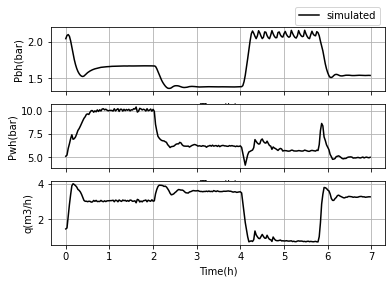

In [3]:
#Mostrar os dados de exógenas e estados
simulador.BCS_EXP.plot_ss

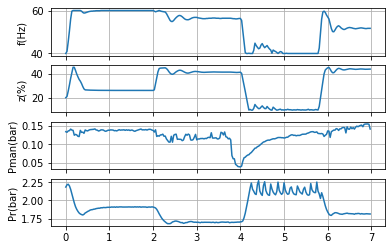

In [4]:
simulador.BCS_EXP.plot_u

### Simulação para confrontar com os dados experimentais

In [5]:
# =========================================================================
#  carrega as entradas, estados e valores iniciais do BCS LEA   
# =========================================================================
fk,zc,pman,pres=simulador.BCS_EXP.get_exo_values() # Armazenamento dos valores das exógenas
pbh,pwh,q=simulador.BCS_EXP.get_ss_values() # Armazenamento dos valores dos estados
u_0=np.array([fk[0],zc[0],pman[0],pres[0]]) #Valor inicial de entrada
u_exp=np.array([fk,zc,pman,pres])#Empacotamento entradas exógenas experimentais
Y_exp=simulador.BCS_EXP.get_y_values()
x_0=np.array([pbh[0],pwh[0],q[0]])#Empacotamento valor inicial para os estados
x_exp=[pbh,pwh,q]
xss=x_0;uss=u_0 #Iniciar a simulação - nos valores iniciais
#####################################################
nsim=simulador.BCS_EXP.nsim# Time-steps para simulação
ts=simulador.BCS_EXP.ts #Sampling tim
tempo_hora = np.arange(0,nsim*ts,ts)/3600 # vetor de tempo em horas

In [6]:
####################
#Obter os fatores de escalonamento para simulação
xc,x0=norm_values()
####################
xssn = (xss-x0)/xc
#### Transformação para unidades de engenharia (bar, m3/h)
xscale=np.array([1/1e5,1/1e5,3600])
####


In [7]:
#####################
#Definindo entradas exógenas a ser utilizada
uk_1=u_exp.T
##################
initial=[xssn,uss]
Xk,Uk,Yk=simulador.simulate(uk_1[0:2,:],initial)

100

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

100


  0%|          | 0/2 [00:00<?, ?it/s]

[[0.692603, 0.347728, 0.317749]]


CasADi - 2022-01-29 00:33:43 WARNING("int_odes:odeF failed: NaN detected for output ode, at (row 2, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2022-01-29 00:33:43 WARNING("int_odes:odeF failed: NaN detected for output ode, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2022-01-29 00:33:43 WARNING("int_odes:odeF failed: NaN detected for output ode, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2022-01-29 00:33:43 WARNING("int_odes:odeF failed: NaN detected for output ode, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2022-01-29 00:33:43 WARNING("int_odes:odeF failed: NaN detected for output ode, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2022-01-29 00:33:43 WARNING("int_odes:jacF failed: NaN detected for output o0, at nonzero index 6 (row 2, col 2).") [.../casadi/core/oracle_function.cpp:265]
psetup failed: .../casadi/interfaces/sundials/cvodes_interface.cpp:650: '

RuntimeError: Error in Function::operator() for 'int_odes' [CvodesInterface] at .../casadi/core/function.cpp:1368:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_CONV_FAILURE". Consult CVODES documentation.

### Resultados

In [ ]:
Fig_sim=simulador.plotLEA.plot_states([Xk,x_exp],tempo_hora)
Fig_u=simulador.plotLEA.plot_exogenous(Uk,tempo_hora)
Fig_y=simulador.plotLEA.plot_y(tempo_hora,[Yk,Y_exp])